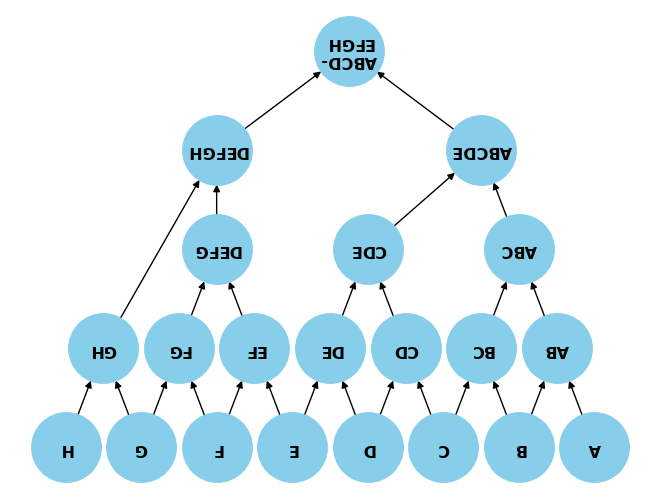

In [76]:
import matplotlib.pyplot as plt
import networkx as nx

def add_edges(graph, parent, children):
    for child in children:
        graph.add_edge(child, parent)  # Add edge from parent to child

# Create a directed graph
G = nx.DiGraph()

# Define nodes and their connections, reversed
top_level_nodes = ["A", "B", "C", "D", "E", "F", "G", "H"]
second_level_nodes = {"AB": ["A", "B"], "BC": ["B", "C"], "CD": ["C", "D"], "DE": ["D", "E"], "EF": ["E", "F"], "FG": ["F", "G"], "GH": ["G", "H"]}
third_level_nodes = {"ABC": ["AB", "BC"], "CDE": ["CD", "DE"], "DEFG": ["EF", "FG"]}
fourth_level_nodes = {"ABCDE": ["ABC", "CDE"], "DEFGH": ["DEFG", "GH"]} 
root = {"ABCDEFGH": ["ABCDE", "DEFGH"]}

# Add nodes and edges to the graph
for node in top_level_nodes:
    G.add_node(node)
for node, children in second_level_nodes.items():
    G.add_node(node)
    add_edges(G, node, children)
for node, children in third_level_nodes.items():
    G.add_node(node)
    add_edges(G, node, children)
for node, children in fourth_level_nodes.items():
    G.add_node(node)
    add_edges(G, node, children)
for node, children in root.items():
    G.add_node(node)
    add_edges(G, node, children)

# Manually setting the positions for the nodes
pos = {
    "A": (7, 0), "B": (6, 0), "C": (5, 0), "D": (4, 0), "E": (3, 0), "F": (2, 0), "G": (1, 0), "H": (0, 0),
    "AB": (6.5, 1), "BC": (5.5, 1), "CD": (4.5, 1), "DE": (3.5, 1), "EF": (2.5, 1), "FG": (1.5, 1), "GH": (0.5, 1),
    "ABC": (6, 2), "CDE": (4, 2), "DEFG": (2, 2),
    "ABCDE": (5.5, 3), "DEFGH": (2, 3),
    "ABCDEFGH": (3.75, 4)
}

# Draw the graph
stitch_flow = nx.draw(G, pos, with_labels=False, node_size=2500, node_color="skyblue", font_size=7, font_weight="bold", arrows=True)

# Add labels manually with rotation
for node, (x, y) in pos.items():
    label = node
    # Split the label for "ABCDEFGH" into two lines
    if node == "ABCDEFGH":
        label = "ABCD-\nEFGH"
    plt.text(x, y, label, fontsize=11.5, fontweight='bold', ha='center', va='center', rotation=180)

# Save the figure and show the plot
plt.savefig("stitch_flow_reversed.png", dpi=300)
plt.show()
